# Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

# load Dataset

In [ ]:
# Load data from csv file
csv_file_path = '/content/heart.csv'
df = pd.read_csv(csv_file_path)

In [ ]:
df.shape


(918, 12)

# Data Preprocessing

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
 #checking the null values

df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# checking the duplicate values

df.duplicated().sum()


0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

In [ ]:
# Label Encoding encoding
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['ChestPainType']=label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG']=label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina']=label_encoder.fit_transform(df['ExerciseAngina'])
# df['ExcerciseAngina']=label_encoder.fit_transform(df['ExcerciseAngina'])
df['ST_Slope']=label_encoder.fit_transform(df['ST_Slope'])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


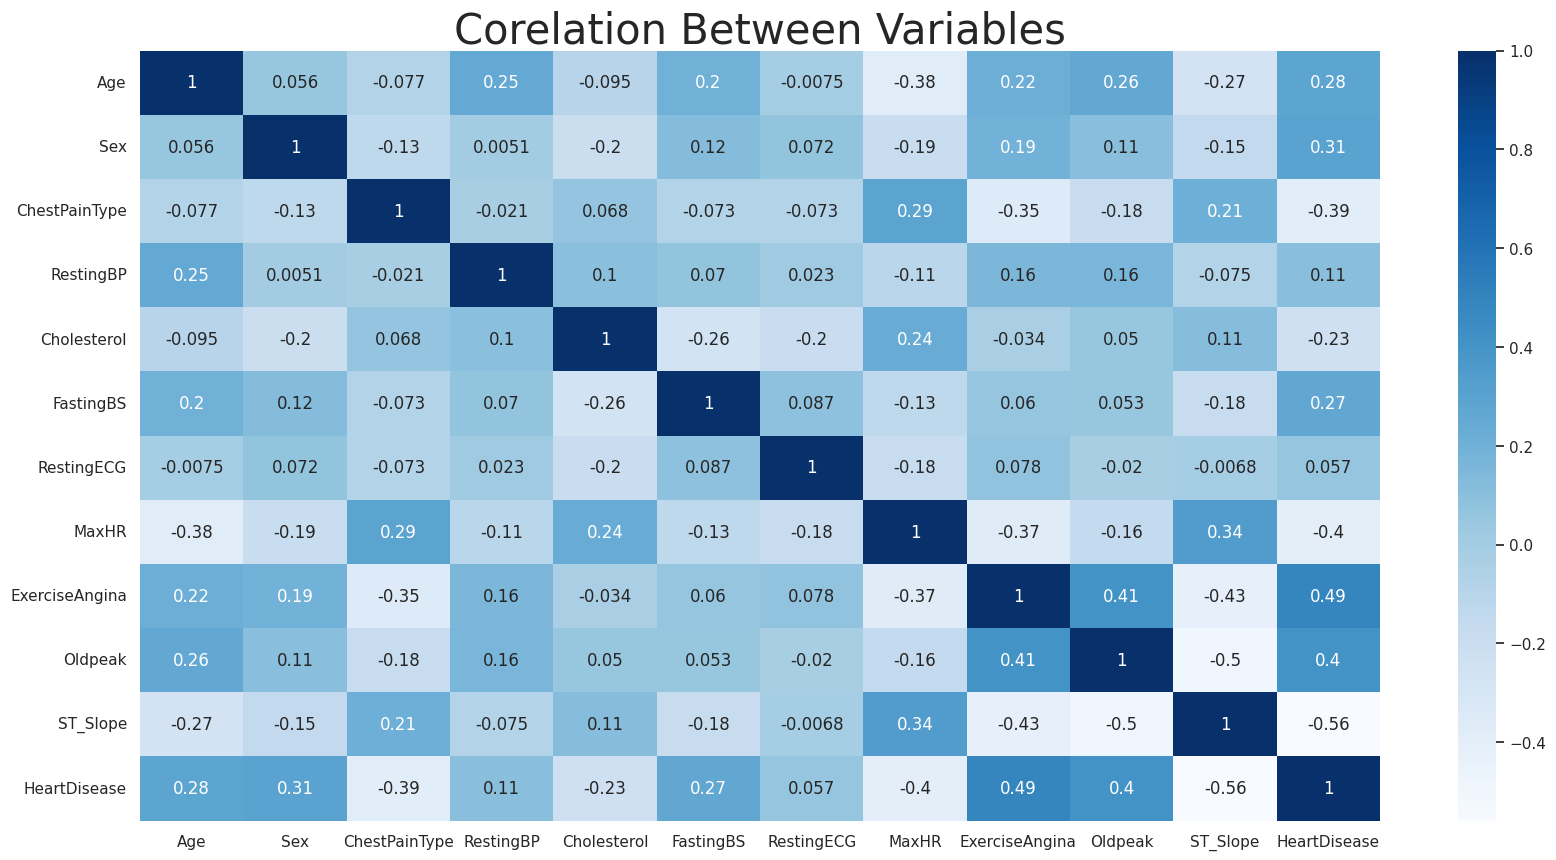

In [ ]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df.corr(), annot = True, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# Drop unnecessary columns
X=df.drop(['HeartDisease'], axis=1)
# Extract target variable
Y = df['HeartDisease']

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

# Model Buidling

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)

# Predict the clusters on the test set
test_predictions = kmeans.predict(X_test_scaled)

# Evaluate the clustering performance
silhouette_score = metrics.silhouette_score(X_test_scaled, test_predictions)
inertia = kmeans.inertia_

# Pseudolabel accuracy
cluster_to_class_mapping = {cluster: np.bincount(y_test[test_predictions == cluster]).argmax() for cluster in range(4)}
predicted_labels = np.array([cluster_to_class_mapping[cluster] for cluster in test_predictions])
pseudolabel_accuracy = np.mean(predicted_labels == y_test)

print(f"Silhouette Score: {silhouette_score}")
print(f"Inertia: {inertia}")
print(f"Pseudolabel Accuracy: {pseudolabel_accuracy *100 }")

Silhouette Score: 0.13549477998849555
Inertia: 5376.1455062608875
Pseudolabel Accuracy: 83.15217391304348


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
